# Ejemplo 5: Boxplots y Violinplots

## 1. Objetivos:
- Aprender a generar boxplots y violinplots para analizar distribuciones de valores numéricos agrupados usando una variable categórica.
 
---
    
## 2. Desarrollo:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [3]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-cleann.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
120585,Nadiya Volodymyrivna Tkachenko (-Sapronova),F,23,165,74.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's Pentathlon,None
124576,"Cornelia Maria ""Cocki"" van Engelsdorp Gastelaa...",F,22,170,67.0,Netherlands,NED,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,None
88962,"Gunhild Margareta ""Gun"" Olsson (-Eriksson)",F,26,166,57.0,Sweden,SWE,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 4 x 100 metres Relay,None
82254,Jason Newth Morris,M,25,178,80.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,Silver
106442,Carlos A. Scanavino Villavicenio,M,24,187,80.0,Uruguay,URU,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 200 metres Freestyle,None


In [4]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)
merged

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
5,24.000000,185.0,82.0,F
6,31.666667,188.0,75.0,M
7,32.000000,183.0,72.0,M
13,34.000000,159.0,55.5,F
...,...,...,...,...
135566,21.000000,175.0,75.0,M
135567,26.000000,183.0,72.0,M
135568,33.000000,171.0,69.0,F


La tabla `merged` tiene 3 variables numéricas y 1 variable categórica. Ya hemos visto cómo podemos analizar la distribución de una variable numérica utilizando boxplots:

<AxesSubplot:xlabel='weight'>

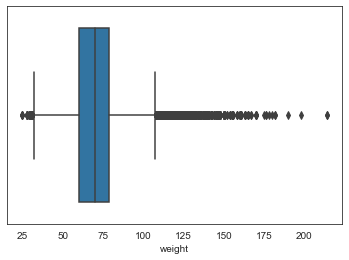

In [5]:
# Los diagramas de caja y brazos se generaban con la función boxplot
sns.boxplot(x=df['weight']) #lo aplicamos a una sola columna

Pero dado que tenemos una variable categórica (en este caso binaria, pues tiene solo dos valores posibles), podemos utilizar dos boxplots paralelos para analizar la distribución de esta misma variable numérica después de ser agrupada utilizando la variable categórica:

<AxesSubplot:xlabel='sex', ylabel='weight'>

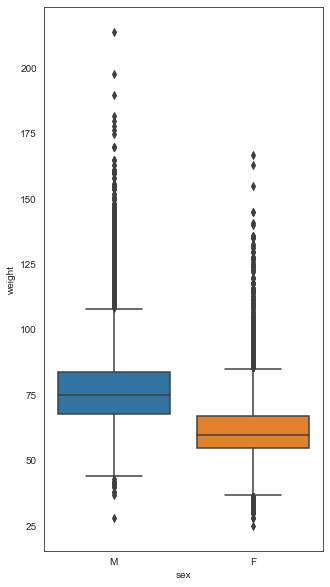

In [6]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=merged, x='sex', y='weight') # x es la variable categórica
# y es la variable numérica

<AxesSubplot:xlabel='weight', ylabel='sex'>

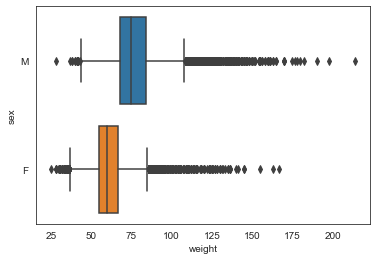

In [9]:
#plt.figure(figsize=(5, 10))
sns.boxplot(data=merged, x='weight', y='sex') # y es la variable categórica
# y es la variable numérica

<AxesSubplot:xlabel='height', ylabel='sex'>

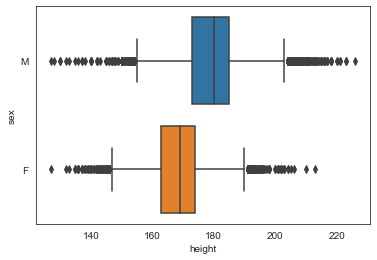

In [10]:
# Para las alturas por género
#plt.figure(figsize=(5, 10))
sns.boxplot(data=merged, x='height', y='sex') # y es la variable categórica
# y es la variable numérica

También podemos explorar las distribuciones usando un **violinplot**. Un violinplot es muy parecido a un boxplot, pero la diferencia es que en vez de graficar frecuencias grafica estimados de densidad. ¿Recuerdas las gráficas de densidad que utilizamos para hacer los histogramas más 'suaves' y poder comparar dos histogramas al mismo tiempo? Bueno, un violinplot es básicamente un boxplot mezclado con una gráfica de densidad.

En un violinplot es mucho más fácil ver ciertos detalles en la distribución de los datos que no es posible ver en los boxplots (ya que un boxplot no tiene mucha flexibilidad en cuanto a figuras se refiere). En cambio, en un violinplot es mucho más difícil ver los valores atípicos y dónde se encuentran ubicados.

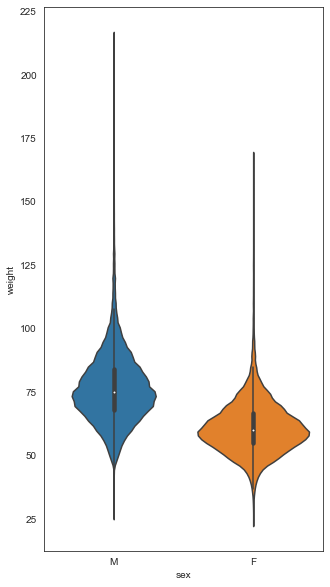

In [11]:
# la función para dibujar el diagrama de violín es 'violinplot'
plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='sex', y='weight');

<AxesSubplot:xlabel='weight', ylabel='sex'>

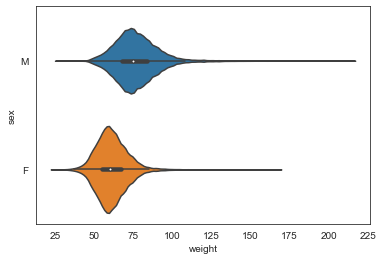

In [14]:
#plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='weight', y='sex') # y es la variable categórica
# y es la variable numérica

La 'pildorita' negra en medio del violinplot representa el Rango Intercuartílico y el punto blanco la mediana. Así puedes comparar más fácilmente lo que estamos viendo en esta gráfica con la gráfica anterior.